In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('datas_ml/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# [목표] 우리가 예측하려고 하는 것은? 경력에 따른 연봉을 예측하고 싶음

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
y = df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [9]:
x = df['YearsExperience']
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [23]:
x = x.to_frame()

In [24]:
# 머신러닝은 x(독립변수) 1개여도, 2D여야함.

# 피처 스케일링
- 독립변수가 1개여서 할 필요가 없음.

# train, test 데이터로 분할

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split(x, y, test_size=0.25)

[    YearsExperience
 26              9.5
 11              4.0
 3               2.0
 4               2.2
 25              9.0
 2               1.5
 21              7.1
 1               1.3
 12              4.0
 17              5.3
 28             10.3
 23              8.2
 18              5.9
 24              8.7
 15              4.9
 7               3.2
 19              6.0
 20              6.8
 14              4.5
 13              4.1
 0               1.1
 22              7.9,
     YearsExperience
 10              3.9
 16              5.1
 27              9.6
 5               2.9
 6               3.0
 9               3.7
 29             10.5
 8               3.2,
 26    116969.0
 11     55794.0
 3      43525.0
 4      39891.0
 25    105582.0
 2      37731.0
 21     98273.0
 1      46205.0
 12     56957.0
 17     83088.0
 28    122391.0
 23    113812.0
 18     81363.0
 24    109431.0
 15     67938.0
 7      54445.0
 19     93940.0
 20     91738.0
 14     61111.0
 13     57081.0
 0    

In [27]:
# 리턴값을 받는 변수 순서 중요
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# 모델 학습하기

## AI 모델 객체 생성

In [28]:
# 예측값이 연봉(실수값) -> 회귀 문제
from sklearn.linear_model import LinearRegression

In [29]:
# 빈 깡통 AI
model_lr = LinearRegression()
model_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# 정상적인 오류 <- 학습전에는 없음
model_lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [31]:
# 정상적인 오류 <- 학습전에는 없음
model_lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

## 학습하기

In [32]:
# model_lr.fit(학습문제, 학습정답)
model_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# w (기울기)
model_lr.coef_

array([9576.01927113])

In [ ]:
# b (절편)
model_lr.intercept_

np.float64(25170.545332266076)

## 모델 테스트

In [35]:
# 테스트 데이터를 넣어, 결과 예측하기
y_pred = model_lr.predict(x_test)
y_pred

array([ 72093.0397608 ,  75923.44746925,  60601.81663545, 117100.33033511,
        35704.16653051, 125718.74767913,  63474.62241679,  82626.66095905])

## 모델 평가
- 모델이 테스트한 결과(y_pred)와 실제값(y_test)의 오차의 제곱, 합의 평균 계산

In [36]:
# 정답
y_test

15     67938.0
17     83088.0
9      57189.0
27    112635.0
0      39343.0
29    121872.0
11     55794.0
19     93940.0
Name: Salary, dtype: float64

In [37]:
# 예측값
y_pred

array([ 72093.0397608 ,  75923.44746925,  60601.81663545, 117100.33033511,
        35704.16653051, 125718.74767913,  63474.62241679,  82626.66095905])

In [38]:
x_test

,YearsExperience
15,4.9
17,5.3
9,3.7
27,9.6
0,1.1
29,10.5
11,4.0
19,6.0


In [39]:
# 오차 제곱
(y_test - y_pred)**2

15    1.726436e+07
17    5.133081e+07
9     1.164732e+07
27    1.993918e+07
0     1.324111e+07
29    1.479747e+07
11    5.899196e+07
19    1.279916e+08
Name: Salary, dtype: float64

In [40]:
# 오차 : error의 제곱을 합한 후 데이터의 갯수로 나눔<- 오차제곱을 구한후 평균 구함 (MSE)
((y_test - y_pred)**2).mean() 

np.float64(39400479.80736506)

In [41]:
# RMSE (MSE는 너무크기 때문에 RMS구함.)
np.sqrt(((y_test - y_pred)**2).mean())

np.float64(6276.980150308352)

In [42]:
# MAE (절대값으로)
abs(y_test - y_pred).mean()

np.float64(5709.660233558608)

## 오차를 시각적으로 확인하기

In [48]:
df_test = y_test.to_frame()

In [49]:
df_test['y_pred'] = y_pred

In [50]:
df_test

,Salary,y_pred
15,67938.0,72093.039761
17,83088.0,75923.447469
9,57189.0,60601.816635
27,112635.0,117100.330335
0,39343.0,35704.166531
29,121872.0,125718.747679
11,55794.0,63474.622417
19,93940.0,82626.660959


## 실제값과 예측값의 차이 시각화

In [51]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')  # Windows 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 마이너스 깨짐 방지

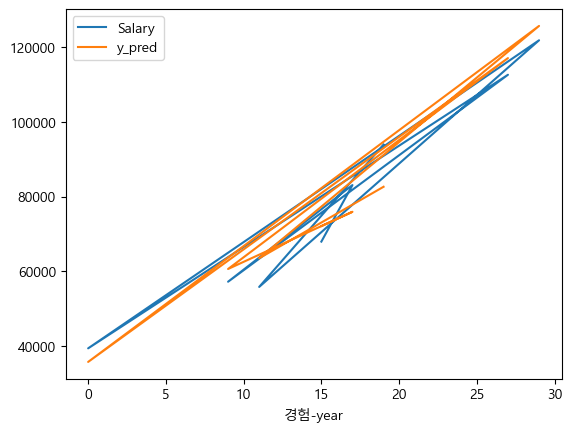

In [52]:
# 근무 년수에 따른 연봉 
df_test.plot(kind='line')
plt.xlabel("경험-year")
plt.show()

In [ ]:
df_test = df_